In [96]:
# install necessary libraries
library(dplyr) 
library(reshape2) 
library(ggplot2) # visualization
install.packages('tsfeatures')
library(tsfeatures) # feature selection
install.packages('zoo')
library(zoo) # windows processing
install.packages('ClusterR')
library(ClusterR) # GMM
install.packages('TSA')
library(TSA)  # Fourier

Warning message:
"package 'tsfeatures' is in use and will not be installed"
Warning message:
"package 'zoo' is in use and will not be installed"
Warning message:
"package 'ClusterR' is in use and will not be installed"
Warning message:
"package 'TSA' is in use and will not be installed"


In [97]:
# load the train and test dataset
our_train = read.csv('./train_data_withlabels.csv')
our_test = read.csv('./test_data_nolabels.csv')

In [3]:
# for setting the index
our_train.len = length(our_train$X)
our_test.len = length(our_test$X)
# view the structure of train dataset
head(our_train)

,X,load,ac,ev,oven,wash,dryer,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,105541,2.245,0,0,0,0,0,0,Sun,0.987,0.987,6.215,3.074549,0.6788858,0.05290291,0.9940715
2,105542,2.259,0,0,0,0,0,0,Sun,0.014,0.014,6.215,3.172867,0.6674503,0.05482926,0.9941540
3,105543,2.269,0,0,0,0,0,0,Sun,0.010,0.010,6.215,3.270112,0.6477770,0.05699074,0.9942200
4,105544,2.268,0,0,0,0,0,0,Sun,-0.001,0.001,6.215,3.303763,0.6292270,0.05760593,0.9941497
5,105545,2.270,0,0,0,0,0,0,Sun,0.002,0.002,6.215,3.302744,0.6212951,0.08263997,0.9940406
6,105546,2.259,0,0,0,0,0,0,Sun,-0.011,0.011,6.215,3.298258,0.6269564,0.08978753,0.9939864


In [4]:
# view the structure of test dataset
head(our_test)

,X,load,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1.869,0,Mon,0.000,0.000,0,0,0,0,0
2,2,1.673,0,Mon,-0.196,0.196,0,0,0,0,0
3,3,1.660,0,Mon,-0.013,0.013,0,0,0,0,0
4,4,1.772,0,Mon,0.112,0.112,0,0,0,0,0
5,5,1.679,0,Mon,-0.093,0.093,0,0,0,0,0
6,6,1.775,0,Mon,0.096,0.096,0,0,0,0,0


From the dataset,dayofweek is a column of categorical data, and in order to convert them into integers for classification, we need to convert them into factors first. X is a column of continuous index that goes from 1 to 523,260, and with a bit of calculation, we can notice that X is actually the timestamp of load monitoring in minutes.

In [5]:
# convert data type into factor for later converting into integer
our_train$dayofweek = as.factor(our_train$dayofweek)
our_test$dayofweek = as.factor(our_test$dayofweek)

In [6]:
# make data in day of week column as integer for classification
our_train$dayofweek = as.integer(our_train$dayofweek)
our_test$dayofweek = as.integer(our_test$dayofweek)

In [7]:
#set the index
index = sample(1:our_train.len, our_train.len*0.8, replace = FALSE)

In [8]:
# view the details
our_train

X,load,ac,ev,oven,wash,dryer,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
105541,2.245,0,0,0,0,0,0,4,0.987,0.987,6.215,3.074549,0.6788858,0.05290291,0.9940715
105542,2.259,0,0,0,0,0,0,4,0.014,0.014,6.215,3.172867,0.6674503,0.05482926,0.9941540
105543,2.269,0,0,0,0,0,0,4,0.010,0.010,6.215,3.270112,0.6477770,0.05699074,0.9942200
105544,2.268,0,0,0,0,0,0,4,-0.001,0.001,6.215,3.303763,0.6292270,0.05760593,0.9941497
105545,2.270,0,0,0,0,0,0,4,0.002,0.002,6.215,3.302744,0.6212951,0.08263997,0.9940406
105546,2.259,0,0,0,0,0,0,4,-0.011,0.011,6.215,3.298258,0.6269564,0.08978753,0.9939864
105547,2.250,0,0,0,0,0,0,4,-0.009,0.009,6.215,3.289135,0.6401214,0.08527583,0.9939265
105548,2.251,0,0,0,0,0,0,4,0.001,0.001,6.215,3.238982,0.6519165,0.35420293,0.9927028
105549,2.264,0,0,0,0,0,0,4,0.013,0.013,6.215,3.203236,0.6556001,0.37252865,0.9924744


In [9]:
# check the correlation between the appliance and features
cor(our_train[,c(3:7)], our_train[,c(-1,-3:-7)])

,load,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
ac,0.90813819,0.15136386,0.003981092,0.1358902060,0.191701501,0.51831900,0.493826098,-0.164815279,-0.10016180,0.11784839
ev,0.13261142,0.05313881,-0.006671534,0.0026146738,0.002921232,0.10117639,0.012397606,0.003003949,0.01564352,-0.01551130
oven,0.19862596,0.08583702,-0.003049596,0.0671467679,0.188436612,0.18508330,0.095902672,0.112254191,-0.03153823,-0.05496844
wash,0.03805982,0.04496511,0.008642476,0.0050529994,0.011816291,0.02723213,-0.006345821,0.028599082,-0.02214799,-0.00112055
dryer,0.05539912,0.07059562,0.006581563,0.0008338968,0.009838868,0.04226480,-0.005888414,0.028004493,-0.02773110,-0.02460368


Here are the features that come with the original data, and we can use a correlation matrix to identify the relationships of each appliance with these features.  

AC has an extremely strong positive correlation with the load value, strong positive correlation with max and var, and a relatively strong positive correlation with hourofday. A strong correlation with max and load means that AC has significant impact on the final load recording, i.e. it uses a large portion of electricity of the household. Its strong correlation with var indicates that its variance of load is high, i.e. it only operates during a specific timeframe and remains dormant for the rest of the time period.  

EV has a relatively strong positive correlation with load, max and hourofday, which means that EV contributes moderately on the final load recording, and it operates dependently on the time period.  

Oven has a relatively strong positive correlation with load, absdif and entropy, which means that oven contributes moderately on the final load recording. It has a weak positive correlation with hourofday, which means it operates somewhat dependently on the time period.

Wash and dryer have very weak positive correlation with load and hourofday. By common sense, these two appliances are usually used one after the other, so it’s reasonable that they have similar correlation with the features.


`summarise()` ungrouping output (override with `.groups` argument)



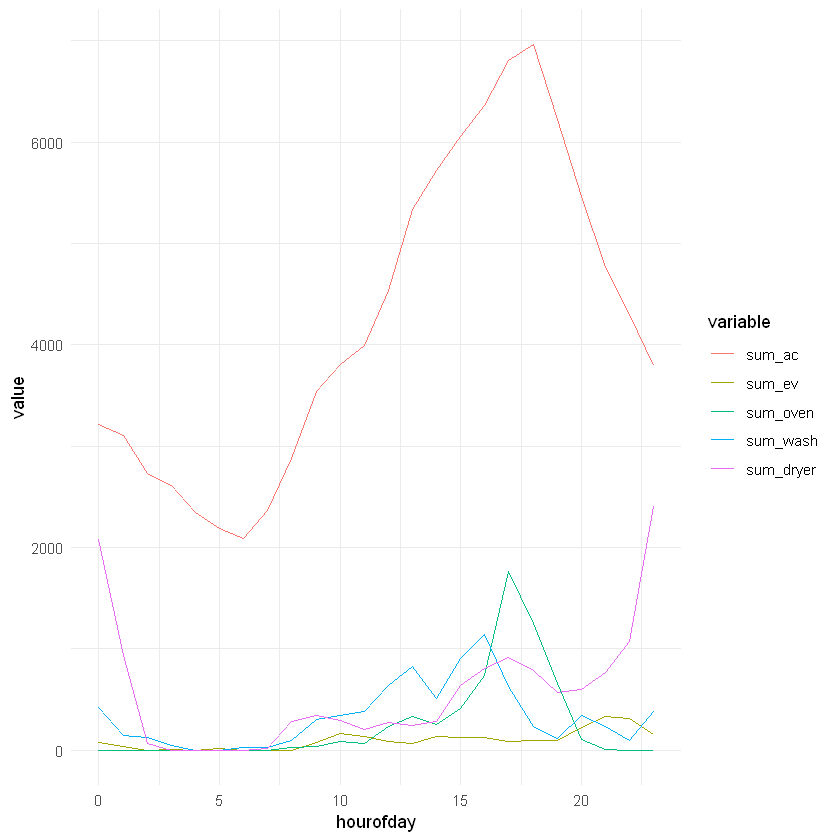

In [10]:
# view the usage situation about each appliance within a day
new_hourofday <- our_train %>% group_by(hourofday)
each_hour = summarise(new_hourofday,
    sum_ac = sum(ac),
    sum_ev = sum(ev),
    sum_oven = sum(oven),
    sum_wash = sum(wash),
    sum_dryer = sum(dryer)
)
# melt the hour of each appliance
melt.eachhour = melt(each_hour, id='hourofday')
# plot the usage of each appliance within a day
ggplot(melt.eachhour) + geom_line(aes(x=hourofday, y=value, col=variable)) + theme_minimal()

From the plot, AC reaches its peak at around 6pm, which is the time when people come home from work and reaches its bottom at around 6am, which is the time when people get out of bed. It fits the profile when people turn on the AC when they come home and turn off the AC before they go to work.  

Oven reaches its peak at around 5:30pm, which is the time when people come home from work and remains dormant for the rest of the day. It operates only at dinner time.  

EV reaches its peak at around 9pm, which is the time when people are getting ready to sleep and remains dormant for the rest of the day. It fits the profile when people charge their vehicle before going to bed.  

Wash and dryer has a clear sequential pattern: people wash their clothes before drying them. Dryer reaches its peak at around 12am, which means people tend to dry their clothes before going to bed and leave their clothes in the dryer overnight. 

`summarise()` ungrouping output (override with `.groups` argument)



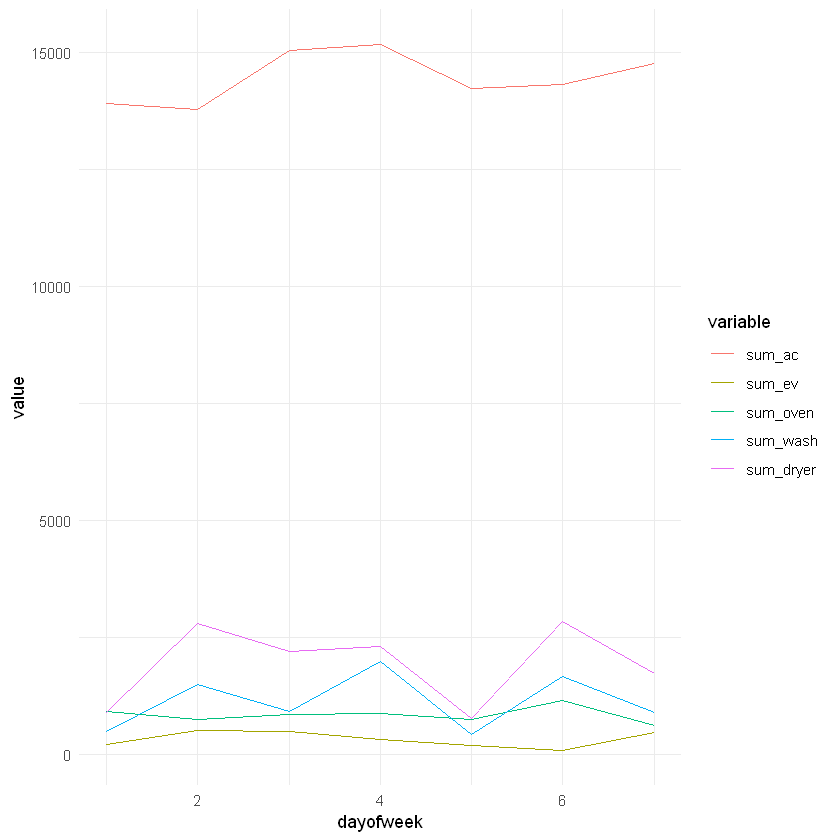

In [11]:
# view the usage situation about each appliance within a week
new_dayofweek <- our_train %>% group_by(dayofweek)
each_day = summarise(new_dayofweek,
    sum_ac = sum(ac),
    sum_ev = sum(ev),
    sum_oven = sum(oven),
    sum_wash = sum(wash),
    sum_dryer = sum(dryer)
)
# melt the daily usage of each appliance
melt.eachday = melt(each_day, id='dayofweek')
# plot the usage of each appliance within a week
ggplot(melt.eachday) + geom_line(aes(x=dayofweek, y=value, col=variable)) + theme_minimal()

AC and oven operate almost every day, since people need to have dinner and sleep with air conditioning every day. Wash and dryer follow a laundry day pattern: judging from the plot, we guess the laundry day pattern for this family is every three days. EV has a slight operational pattern: it reaches its bottom during the weekend, where people don’t use their vehicle as much as during weekdays.

In [12]:
#principle component analysis (PCA)
PCA = prcomp(our_train[c(-1,-3:-7)])

In [13]:
# view the details of PCA
summary(PCA)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     6.9749 2.9577 2.47475 2.00101 1.42257 0.70970 0.54603
Proportion of Variance 0.6893 0.1240 0.08678 0.05673 0.02867 0.00714 0.00422
Cumulative Proportion  0.6893 0.8133 0.90004 0.95677 0.98545 0.99258 0.99681
                           PC8     PC9    PC10
Standard deviation     0.46360 0.09291 0.04239
Proportion of Variance 0.00305 0.00012 0.00003
Cumulative Proportion  0.99985 0.99997 1.00000

From summary, we can know that we just need to use PC1 and PC2 as they only cost 20% of proportion.

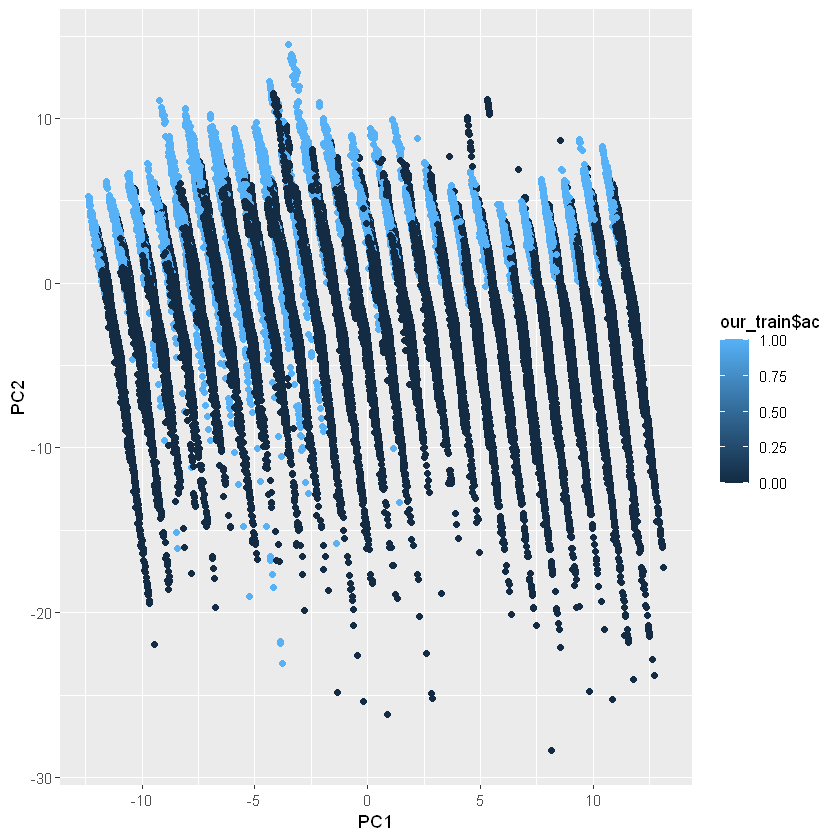

In [14]:
# view the boundary of ac
ggplot(data=as.data.frame(PCA$x), aes(x=PC1, y=PC2)) +
    geom_point(aes(col=our_train$ac))


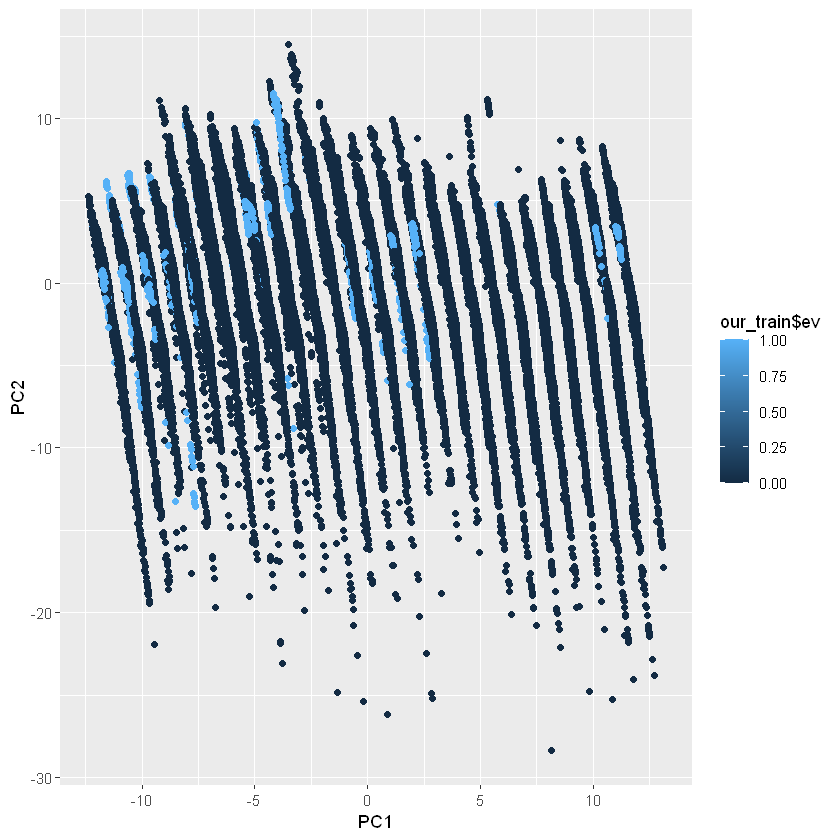

In [15]:
# view the boundary of ev
ggplot(data=as.data.frame(PCA$x), aes(x=PC1, y=PC2)) +
    geom_point(aes(col=our_train$ev))

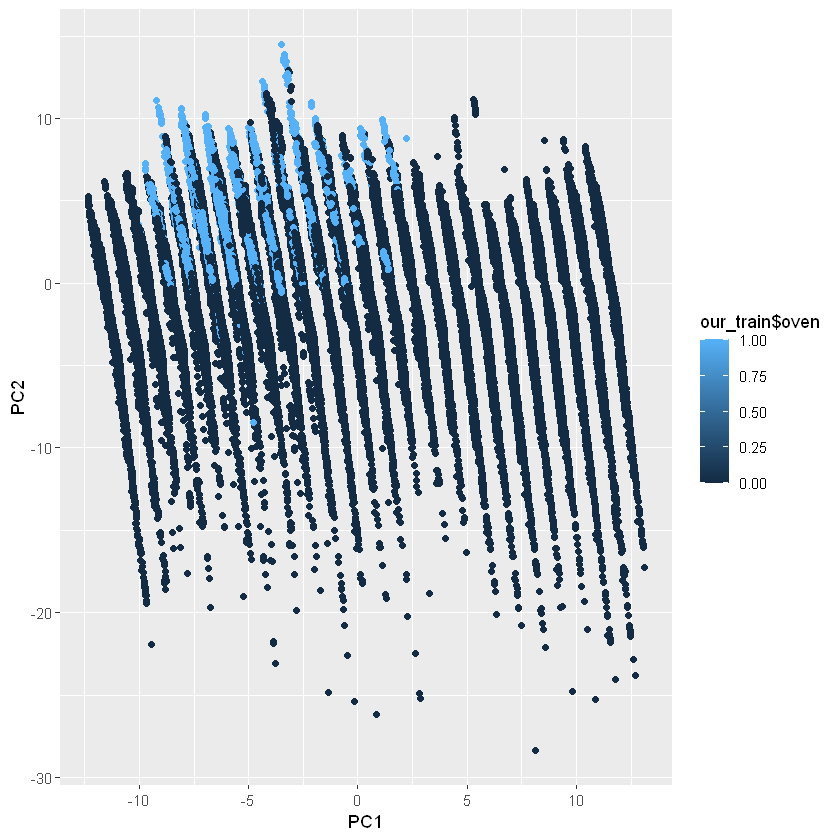

In [16]:
# view the boundary of oven
ggplot(data=as.data.frame(PCA$x), aes(x=PC1, y=PC2)) +
    geom_point(aes(col=our_train$oven))

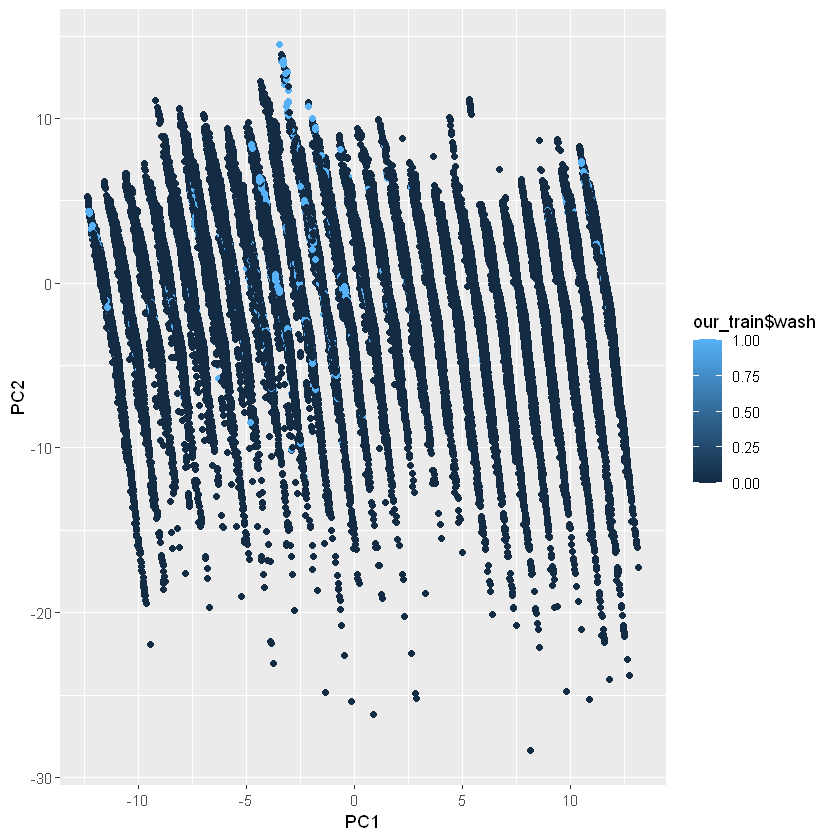

In [17]:
# view the boundary of wash
ggplot(data=as.data.frame(PCA$x), aes(x=PC1, y=PC2)) +
    geom_point(aes(col=our_train$wash))

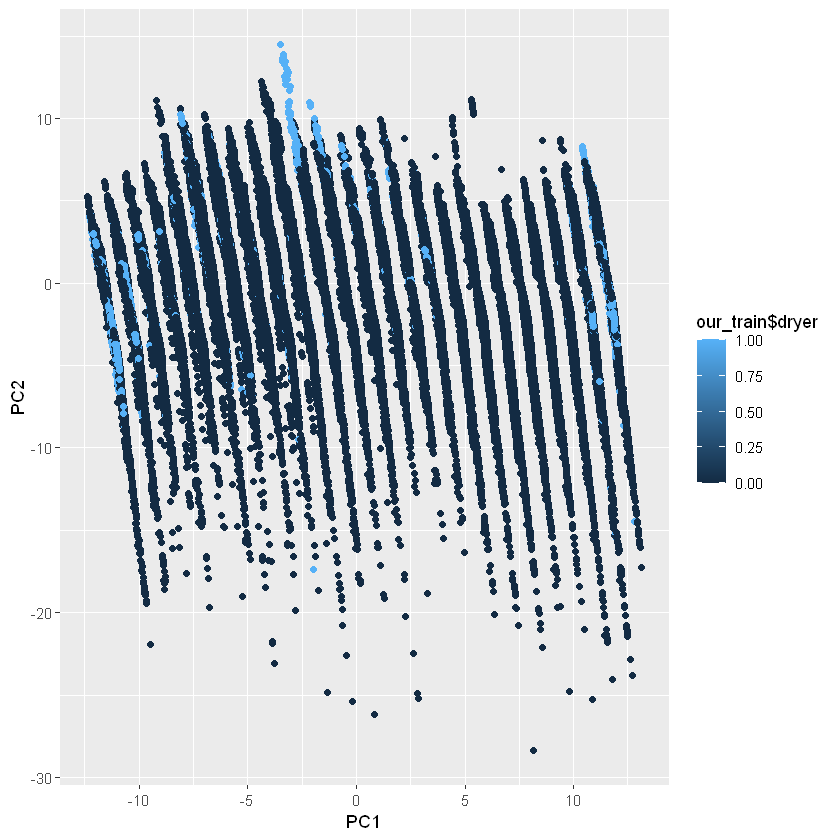

In [18]:
# view the boundary of dryer
ggplot(data=as.data.frame(PCA$x), aes(x=PC1, y=PC2)) +
    geom_point(aes(col=our_train$dryer))

From the plots aboved, we can know that the boundary of ac, ev and oven are relatively clear,which means they can be predicted easier while the boundary of wash and dryer are not clear and it means that they are not easily predicted.

In [19]:
whole = rbind(our_test, our_train[,c(-3:-7)])
whole.len = length(whole$X)

In [20]:
p = periodogram(whole$load, plot=FALSE)
dd = data.frame(freq=p$freq, spec=p$spec)
order = dd[order(-dd$spec),]
top = head(order, 5)

We mentioned that X is the timestamp column in terms of minutes, and if we look close enough, we can see that the training data and the test data are two parts of a data of load recording for an entire year in whole. Therefore, in order to add features to the data, we must add the corresponding feature into both the training and testing data. The approach we choose is to first combind training and testing data into a data in whole without labels, then add the features into the data in whole and redistribute the corresponding columns back to both original training and testing data.  

To determine whether the data in whole has some kind of spectral density. After we calculate the density’s frequency and spectrum using periodogram, we order them with respect to its frequency. (In this case spectrum has very little meaning to us) We choose the top five frequencies: per year, per day, per half a year and per season.(There are 2 frequecies of per day) These frequencies can help us develop new time related features to the appliances.

We think the usage of the appliances might change different over season.So we add season as a feature and check whether it have effects on the appliances.


In [21]:
season = c()
for (i in 1:4){
    season = c(season, rep(i, 60*24*91))
}

In [22]:
whole$season = season[1:whole.len]
our_test$season = whole$season[1:our_test.len]
our_train$season = whole$season[(our_test.len+1):whole.len]

`summarise()` ungrouping output (override with `.groups` argument)



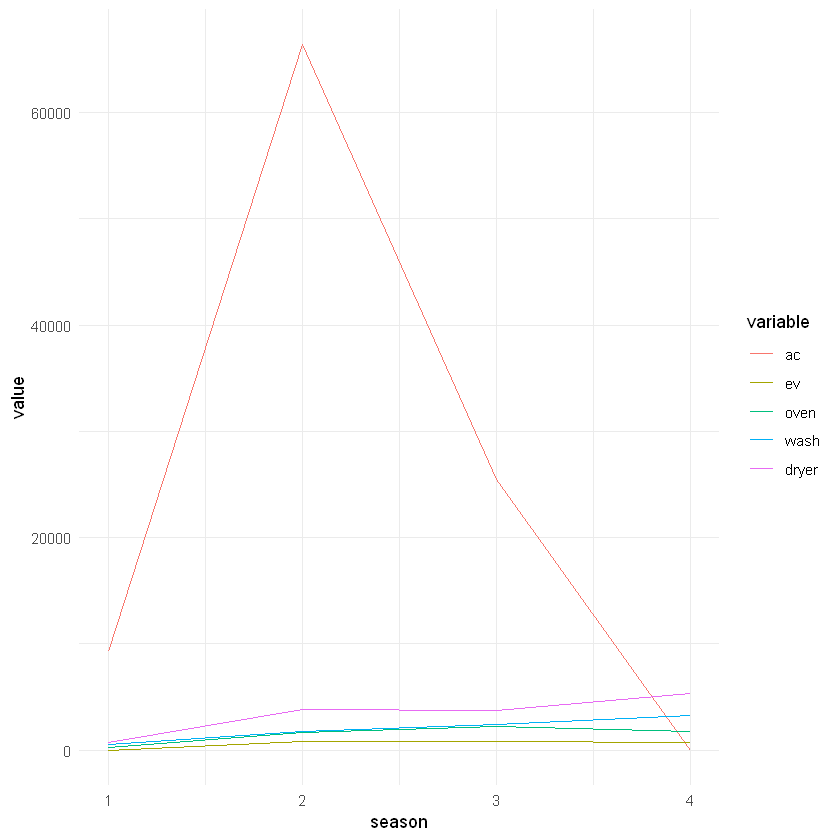

In [23]:
per_season <- our_train %>% group_by(season)
eachseason = summarise(per_season,
    ac = sum(ac),
    ev = sum(ev),
    oven = sum(oven),
    wash = sum(wash),
    dryer = sum(dryer)
)
melt.season = melt(eachseason, id='season')
ggplot(melt.season) + geom_line(aes(x=season, y=value, col=variable)) + theme_minimal()

Here we have a new feature as an example: season. Season can be derived from the timestamps of each row, and separate the data in whole into 4 seasons.  

AC reaches it peak during the summer and reaches its bottom during the winter as summer is so hot that people need to open ac frequently and the rest of the appliances have a slight increase during the winter but overall remains at similar level.

In [24]:
our_train

X,load,ac,ev,oven,wash,dryer,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst,season
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
105541,2.245,0,0,0,0,0,0,4,0.987,0.987,6.215,3.074549,0.6788858,0.05290291,0.9940715,1
105542,2.259,0,0,0,0,0,0,4,0.014,0.014,6.215,3.172867,0.6674503,0.05482926,0.9941540,1
105543,2.269,0,0,0,0,0,0,4,0.010,0.010,6.215,3.270112,0.6477770,0.05699074,0.9942200,1
105544,2.268,0,0,0,0,0,0,4,-0.001,0.001,6.215,3.303763,0.6292270,0.05760593,0.9941497,1
105545,2.270,0,0,0,0,0,0,4,0.002,0.002,6.215,3.302744,0.6212951,0.08263997,0.9940406,1
105546,2.259,0,0,0,0,0,0,4,-0.011,0.011,6.215,3.298258,0.6269564,0.08978753,0.9939864,1
105547,2.250,0,0,0,0,0,0,4,-0.009,0.009,6.215,3.289135,0.6401214,0.08527583,0.9939265,1
105548,2.251,0,0,0,0,0,0,4,0.001,0.001,6.215,3.238982,0.6519165,0.35420293,0.9927028,1
105549,2.264,0,0,0,0,0,0,4,0.013,0.013,6.215,3.203236,0.6556001,0.37252865,0.9924744,1


In [25]:
our_gmm = GMM(whole,gaussian_comps = 10,dist_mode = "eucl_dist",seed_mode = "random_subset",
             km_iter = 10,em_iter = 5,verbose = FALSE,var_floor = 1e-10,seed = 1)

In [26]:
gmm_pred = predict_GMM(whole, our_gmm$centroids, our_gmm$covariance_matrices, our_gmm$weights)

In [27]:
whole$our_gmm_label = as.matrix(gmm_pred)[3,]$cluster_labels
our_test$our_gmm_label = whole$our_gmm_label[1:our_test.len]
our_train$our_gmm_label = whole$our_gmm_label[(our_test.len+1):whole.len]

To generate more new features, we use Gaussian Mixture Model to generate latent variables for the data in whole. Gaussian Mixture Model uses a probability distribution to estimate the likelihood of a given point in a continuous set. Since there are 10 original features, we set the number of gaussian components at 10.

`summarise()` ungrouping output (override with `.groups` argument)



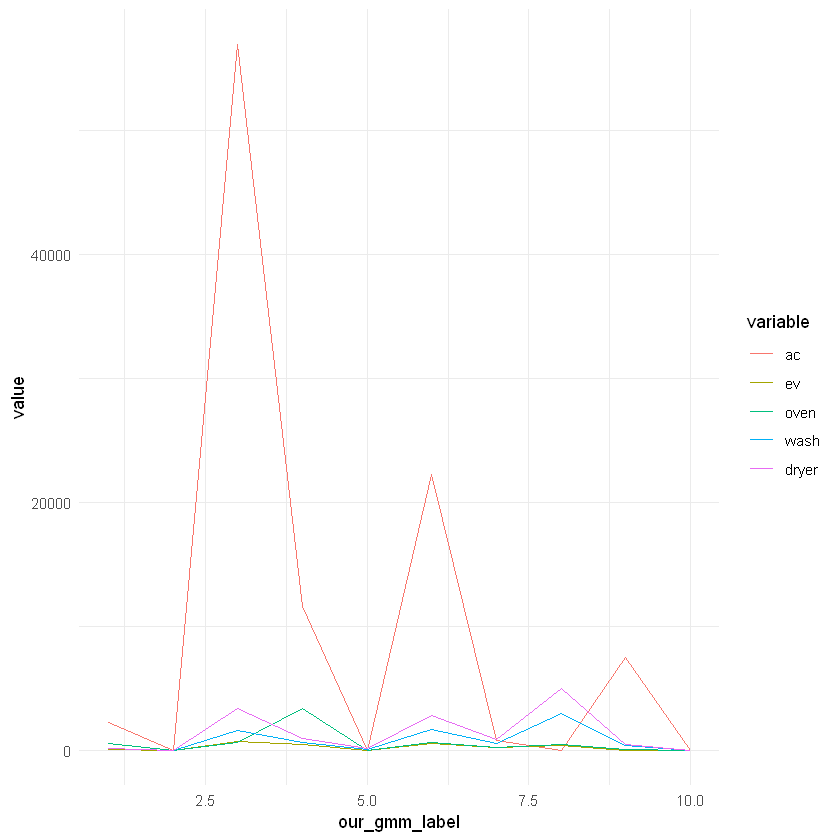

In [28]:
by.gmm <- our_train %>% group_by(our_gmm_label)
pergmm = summarise(by.gmm,
    ac = sum(ac),
    ev = sum(ev),
    oven = sum(oven),
    wash = sum(wash),
    dryer = sum(dryer)
)
melt.gmm = melt(pergmm, id='our_gmm_label')
ggplot(melt.gmm) + geom_line(aes(x=our_gmm_label, y=value, col=variable)) + theme_minimal()

AC responded violently to the newly generated labels: it reaches its peak and bottom at some of the labels. Oven, wash and dryer responded heavily to the labels as well, while ev showed little correlation with the newly generated labels.

In [29]:
# reshape the processed data frame 
featuremender = function(newcolumn) {
    newcolumn = as.matrix(newcolumn)
    w = dim(newcolumn)[2]
    mend = matrix(rep(0, w*30), nrow=30)
    newcolumn = rbind(mend, newcolumn)
    newcolumn = rbind(newcolumn, mend)
    return(newcolumn)
}

Given the fact that some of the newly generated features have multiple values, we need an auxiliary function to help mend the values together. The function featuremender takes in new column(s) and convert them into a matrix. Use the width of the matrix to generate a temporary mending matrix consists of zeros of length 30, which is the neighbourhood time window of 30 minutes around each load data point, and width the same as the width of the new column matrix. Then we attach the temporary mending matrix of zeros to the top and bottom of the new column matrix such that the first and last 30 rows are all zeros.  

Since the results of newly generated feature columns have no value for the first and last 30 rows, i.e. it cannot reach any result within the first and last neighbourhood time window, we use featuremender to replace the first and last 30 rows as zeros.


In [30]:
# zoo with width = 61 based on window size
our_col = rollapply(zoo(whole$load), width=61, FUN = lumpiness)

width=61 is because of the periodicity of 0.7 hour, the value should not be greater than 2 cycles, which is 82. After debugging, it is found that 61 has a better performance

After that,We perform feature selection according to the features given in the tsfeature library and check the correlation between this feature and appliances.Finally, we keep 4 different features lumpiness,my_entropy,diff1_acf1,x_acf1 because they have relatively strong correlation with the appliances and we can make better prediction with them. The correlation between these 4 features and ac are -0.12,-0.09,0.15,0.17 respectively.

In [31]:
# add the new feature to the two data frame
our_col = featuremender(our_col)

In [32]:
# add the identified feature to the data frame
our_test$lumpiness = our_col[1:our_test.len, ]
our_train$lumpiness = our_col[(our_test.len+1):whole.len, ]
# check the correlation bewteen the new feature and the appliances
cor(our_train[,c(3:7)], our_train$lumpiness)

ac,-0.12844093
ev,0.02479681
oven,-0.02933683
wash,-0.00626104
dryer,-0.01714648


In [33]:
# zoo with width = 61 based on window size
our_col = rollapply(zoo(whole$load), width=61, FUN = entropy)

In [34]:
# add the new feature to the two data frame
our_col = featuremender(our_col)
# add the identified feature to the data frame
our_test$my_entropy = our_col[1:our_test.len, ]
our_train$my_entropy = our_col[(our_test.len+1):whole.len, ]
# check the correlation bewteen the new feature and the appliances
cor(our_train[,c(3:7)], our_train$my_entropy)

ac,-0.091754273
ev,-0.018042326
oven,0.078172089
wash,0.019498952
dryer,-0.003278895


In [35]:
# zoo with width = 61 based on window size
our_col = rollapply(zoo(whole$load), width=61, FUN = acf_features)

In [36]:
# add the new feature to the two data frame
our_col = featuremender(our_col)
# add the identified feature to the data frame
our_test$diff1_acf1 = our_col[1:our_test.len,'diff1_acf1' ]
our_train$diff1_acf1 = our_col[(our_test.len+1):whole.len, 'diff1_acf1']
# check the correlation bewteen the new feature and the appliances
cor(our_train[,c(3:7)], our_train$diff1_acf1)

ac,0.15470112
ev,-0.01396371
oven,-0.04730876
wash,-0.04464189
dryer,-0.07464707


In [37]:
# add the identified feature to the data frame
our_test$x_acf1 = our_col[1:our_test.len,'x_acf1' ]
our_train$x_acf1 = our_col[(our_test.len+1):whole.len,'x_acf1' ]
# check the correlation bewteen the new feature and the appliances
cor(our_train[,c(3:7)], our_train$x_acf1)

ac,0.17889422
ev,-0.01386890
oven,-0.07899032
wash,-0.01506398
dryer,-0.02836540


In [38]:
tail(our_train)

,X,load,ac,ev,oven,wash,dryer,hourofday,dayofweek,dif,...,var,entropy,nonlinear,hurst,season,our_gmm_label,lumpiness,my_entropy,diff1_acf1,x_acf1
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
417715,523255,2.546,0,0,0,0,0,21,6,-0.008,...,0,0,0,0,4,1,0,0,0,0
417716,523256,2.543,0,0,0,0,0,21,6,-0.003,...,0,0,0,0,4,1,0,0,0,0
417717,523257,2.417,0,0,0,0,0,21,6,-0.126,...,0,0,0,0,4,1,0,0,0,0
417718,523258,0.999,0,0,0,0,0,21,6,-1.418,...,0,0,0,0,4,1,0,0,0,0
417719,523259,0.966,0,0,0,0,0,21,6,-0.033,...,0,0,0,0,4,1,0,0,0,0
417720,523260,0.964,0,0,0,0,0,21,6,-0.002,...,0,0,0,0,4,1,0,0,0,0


Then,I make a backward selection for finding the better model with necessary variables.Then I use exhaustive method to find the best subset.

In [39]:
install.packages('leaps')
library(leaps)
# make a backward selection on ac
summary(regsubsets(ac ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))


Installing package into 'C:/Users/Administrator/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'leaps' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'leaps'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Administrator\Documents\R\win-library\4.0\00LOCK\leaps\libs\x64\leaps.dll to C:\Users\Administrator\Documents\R\win-library\4.0\leaps\libs\x64\leaps.dll: Permission denied"
Warning message:
"restored 'leaps'"



The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpUvpxcB\downloaded_packages


Warning message:
"package 'leaps' was built under R version 4.0.5"


Subset selection object
Call: regsubsets.formula(ac ~ load + hourofday + dayofweek + dif + 
    absdif + max + var + entropy + nonlinear + hurst + season + 
    our_gmm_label + lumpiness + my_entropy + diff1_acf1 + x_acf1, 
    data = our_train[, -1], nvmax = 10, method = "backward")
16 Variables  (and intercept)
              Forced in Forced out
load              FALSE      FALSE
hourofday         FALSE      FALSE
dayofweek         FALSE      FALSE
dif               FALSE      FALSE
absdif            FALSE      FALSE
max               FALSE      FALSE
var               FALSE      FALSE
entropy           FALSE      FALSE
nonlinear         FALSE      FALSE
hurst             FALSE      FALSE
season            FALSE      FALSE
our_gmm_label     FALSE      FALSE
lumpiness         FALSE      FALSE
my_entropy        FALSE      FALSE
diff1_acf1        FALSE      FALSE
x_acf1            FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          load hourofday day

From the summary, we can see that the two most relavant variables to 'ac'are 'load' and 'season' while there are 6 variables are not that relavant.So we can make some selection when we building model.Then I check adjr2 to find the number of variables for modeling. The larger the R-Squared, the better the model fitting effect.

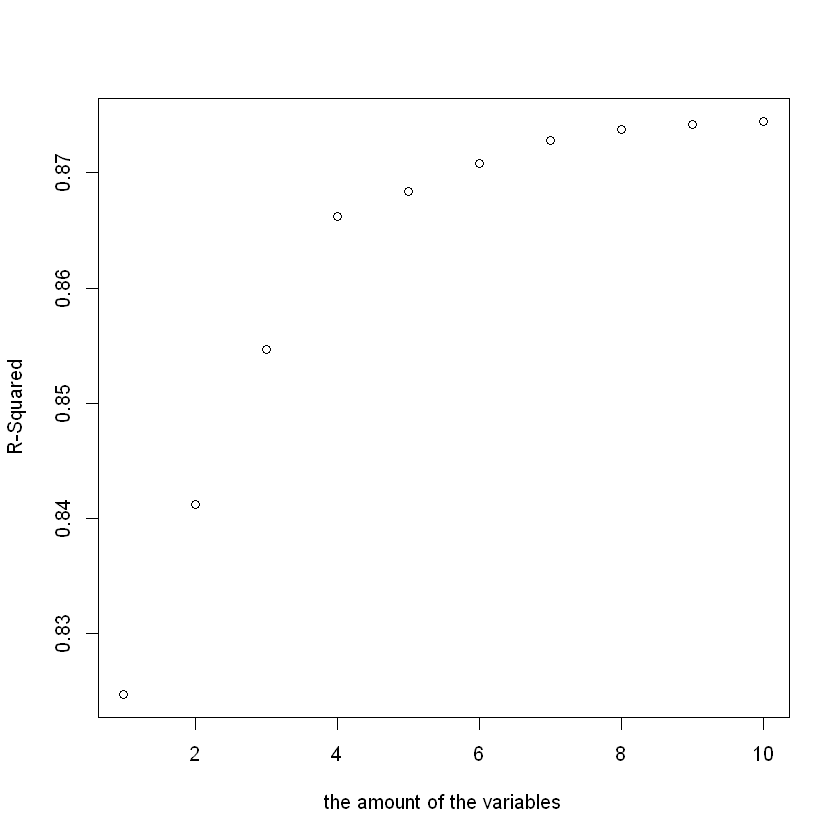

In [40]:
plot(summary(regsubsets(ac ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))$adjr2,xlab='the amount of the variables',ylab='R-Squared')

From the plot, we can know that when we use 10 variables for modeling,R-Squared is larger.So we should remove dayofweek,dif,nonlinear,hurst,our_gmm_label and diff1_acf1 as they are not relavant to 'ac'.

In [41]:
# make a backward selection on ev
summary(regsubsets(ev ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))

Subset selection object
Call: regsubsets.formula(ev ~ load + hourofday + dayofweek + dif + 
    absdif + max + var + entropy + nonlinear + hurst + season + 
    our_gmm_label + lumpiness + my_entropy + diff1_acf1 + x_acf1, 
    data = our_train[, -1], nvmax = 10, method = "backward")
16 Variables  (and intercept)
              Forced in Forced out
load              FALSE      FALSE
hourofday         FALSE      FALSE
dayofweek         FALSE      FALSE
dif               FALSE      FALSE
absdif            FALSE      FALSE
max               FALSE      FALSE
var               FALSE      FALSE
entropy           FALSE      FALSE
nonlinear         FALSE      FALSE
hurst             FALSE      FALSE
season            FALSE      FALSE
our_gmm_label     FALSE      FALSE
lumpiness         FALSE      FALSE
my_entropy        FALSE      FALSE
diff1_acf1        FALSE      FALSE
x_acf1            FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          load hourofday day

From the summary, we can see that the two most relavant variables to 'ev'are 'max' and 'var' while there are 6 variables are not that relavant.So we can make some selection when we building model.Then I check adjr2 to find the number of variables for modeling. The larger the R-Squared, the better the model fitting effect.

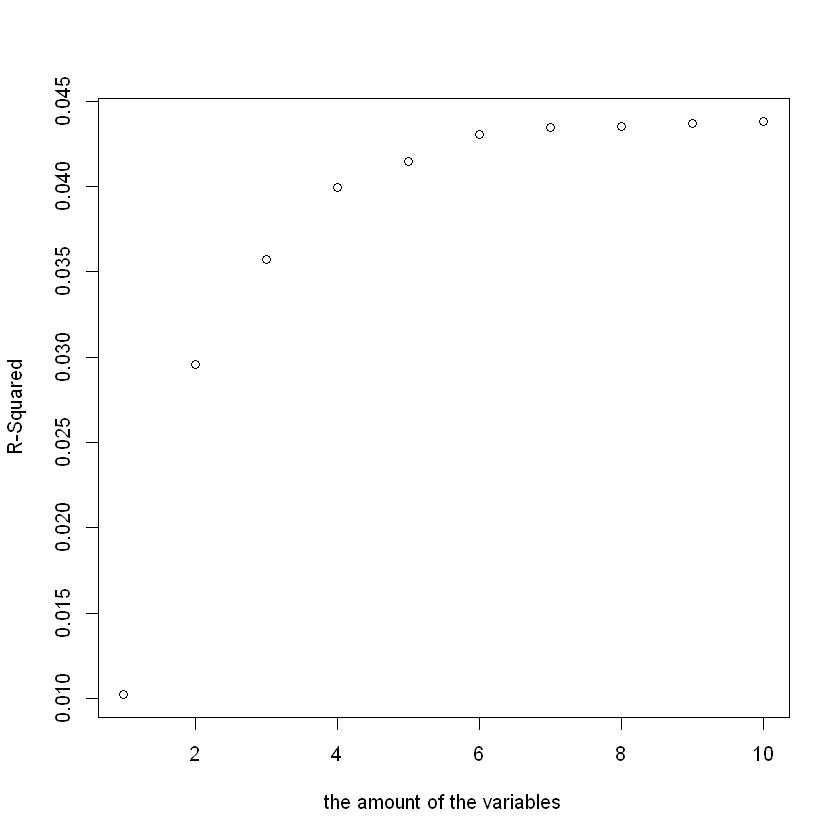

In [42]:
plot(summary(regsubsets(ev ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))$adjr2,xlab='the amount of the variables',ylab='R-Squared')

From the plot, we can know that when we use 10 variables for modeling,R-Squared is larger.So we should remove dayofweek,hourofday,dif,diff1_acf1,hurst and nonlinear as they are not relavant to 'ev'.

In [43]:
# make a backward selection on oven
summary(regsubsets(oven ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))

Subset selection object
Call: regsubsets.formula(oven ~ load + hourofday + dayofweek + dif + 
    absdif + max + var + entropy + nonlinear + hurst + season + 
    our_gmm_label + lumpiness + my_entropy + diff1_acf1 + x_acf1, 
    data = our_train[, -1], nvmax = 10, method = "backward")
16 Variables  (and intercept)
              Forced in Forced out
load              FALSE      FALSE
hourofday         FALSE      FALSE
dayofweek         FALSE      FALSE
dif               FALSE      FALSE
absdif            FALSE      FALSE
max               FALSE      FALSE
var               FALSE      FALSE
entropy           FALSE      FALSE
nonlinear         FALSE      FALSE
hurst             FALSE      FALSE
season            FALSE      FALSE
our_gmm_label     FALSE      FALSE
lumpiness         FALSE      FALSE
my_entropy        FALSE      FALSE
diff1_acf1        FALSE      FALSE
x_acf1            FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          load hourofday d

From the summary, we can see that the two most relavant variables to 'oven'are 'max' and 'our_gmm_label' while there are 6 variables are not that relavant.So we can make some selection when we building model.Then I check adjr2 to find the number of variables for modeling. The larger the R-Squared, the better the model fitting effect.

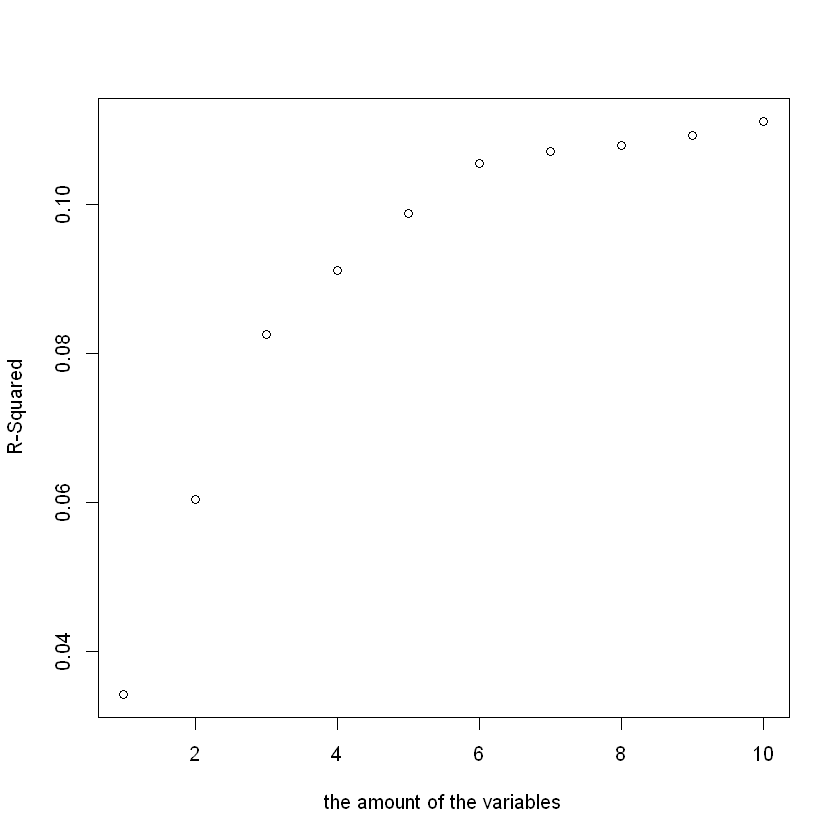

In [44]:
plot(summary(regsubsets(oven ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))$adjr2,xlab='the amount of the variables',ylab='R-Squared')

From the plot, we can know that when we use 10 variables for modeling,R-Squared is larger.So we should remove dayofweek,hourofday,dif,var,nonlinear and season as they are not relavant to 'oven'.

In [45]:
# make a backward selection on wash
summary(regsubsets(wash ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))

Subset selection object
Call: regsubsets.formula(wash ~ load + hourofday + dayofweek + dif + 
    absdif + max + var + entropy + nonlinear + hurst + season + 
    our_gmm_label + lumpiness + my_entropy + diff1_acf1 + x_acf1, 
    data = our_train[, -1], nvmax = 10, method = "backward")
16 Variables  (and intercept)
              Forced in Forced out
load              FALSE      FALSE
hourofday         FALSE      FALSE
dayofweek         FALSE      FALSE
dif               FALSE      FALSE
absdif            FALSE      FALSE
max               FALSE      FALSE
var               FALSE      FALSE
entropy           FALSE      FALSE
nonlinear         FALSE      FALSE
hurst             FALSE      FALSE
season            FALSE      FALSE
our_gmm_label     FALSE      FALSE
lumpiness         FALSE      FALSE
my_entropy        FALSE      FALSE
diff1_acf1        FALSE      FALSE
x_acf1            FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          load hourofday d

From the summary, we can see that the two most relavant variables to 'wash'are 'max' and 'season' while there are 6 variables are not that relavant.So we can make some selection when we building model.Then I check adjr2 to find the number of variables for modeling. The larger the R-Squared, the better the model fitting effect.

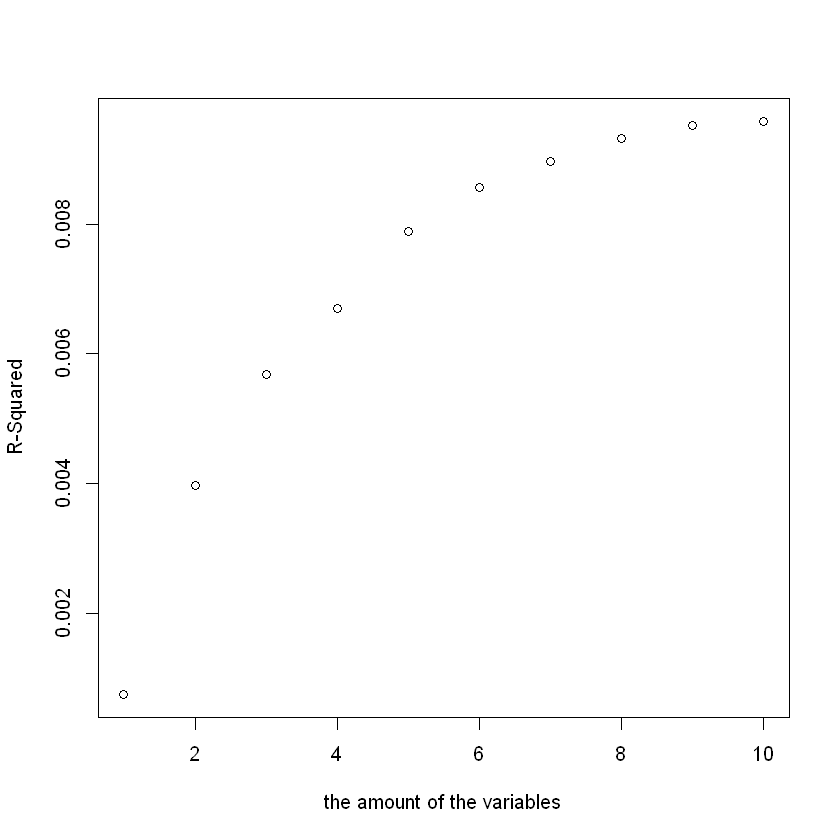

In [46]:
plot(summary(regsubsets(wash ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))$adjr2,xlab='the amount of the variables',ylab='R-Squared')

From the plot, we can know that when we use 10 variables for modeling,R-Squared is larger.So we should remove my_entropy,entropy,dif,absdif,x_acf1 and dayofweek as they are not relavant to 'wash'.

In [47]:
# make a backward selection on dryer
summary(regsubsets(dryer ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))

Subset selection object
Call: regsubsets.formula(dryer ~ load + hourofday + dayofweek + dif + 
    absdif + max + var + entropy + nonlinear + hurst + season + 
    our_gmm_label + lumpiness + my_entropy + diff1_acf1 + x_acf1, 
    data = our_train[, -1], nvmax = 10, method = "backward")
16 Variables  (and intercept)
              Forced in Forced out
load              FALSE      FALSE
hourofday         FALSE      FALSE
dayofweek         FALSE      FALSE
dif               FALSE      FALSE
absdif            FALSE      FALSE
max               FALSE      FALSE
var               FALSE      FALSE
entropy           FALSE      FALSE
nonlinear         FALSE      FALSE
hurst             FALSE      FALSE
season            FALSE      FALSE
our_gmm_label     FALSE      FALSE
lumpiness         FALSE      FALSE
my_entropy        FALSE      FALSE
diff1_acf1        FALSE      FALSE
x_acf1            FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          load hourofday 

From the summary, we can see that the two most relavant variables to 'dryer'are 'max' and 'diff1_acf1' while there are 6 variables are not that relavant.So we can make some selection when we building model.Then I check adjr2 to find the number of variables for modeling. The larger the R-Squared, the better the model fitting effect.

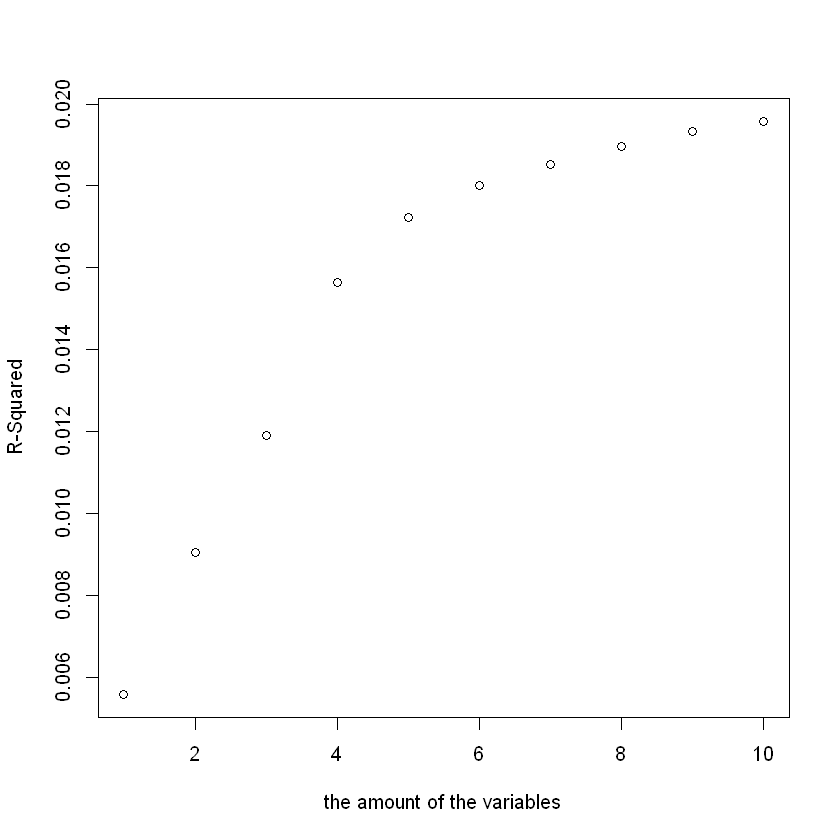

In [48]:
plot(summary(regsubsets(dryer ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst + season + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1,data = our_train[, -1], nvmax = 10, method = "backward"))$adjr2,xlab='the amount of the variables',ylab='R-Squared')

From the plot, we can know that when we use 10 variables for modeling,R-Squared is larger.So we should remove entropy,our_gmm_label,dif,absdif,dayofweek and hurst as they are not relavant to 'dryer'.

In [49]:
# Model statistics function
mod.stat <- function(predict.label, truth.label){
    # instantiate the variables
    accuracy <- NULL
    precision <- NULL
    recall <- NULL
    F1 <- NULL
    
    # make a data frame for easily calculating
    my.df = data.frame(truth.label,predict.label)
    # calculate TN,TP.FN,FP based on formula
    TP = nrow(subset(my.df,(truth.label == TRUE) & (predict.label == TRUE)))
    TN = nrow(subset(my.df,(truth.label == FALSE) & (predict.label == FALSE)))
    FP = nrow(subset(my.df,(truth.label == FALSE) & (predict.label == TRUE)))
    FN = nrow(subset(my.df,(truth.label == TRUE) & (predict.label == FALSE)))
    
    # calculate accuracy,precision,recall,F1 based on formula
    precision = round(TP/(TP+FP),4)
    accuracy = round((TP+TN)/(TP+TN+FP+FN),4)
    recall = round(TP/(TP+FN),4)
    F1 = round(2/((1/recall)+(1/precision)),4)
    
    # Return a list of value
    return(list("accuracy" = accuracy, "precision" = precision, "recall" = recall, "fscore" = F1))
}

In the prediction task,for each appliance,we built 2 different classifer with accordingly different feature selections and select better one after comparing with rmse and F1score.

In [50]:
# my_glm = function(our_train.x, our_train.y, our_test.x){

#     our_train = as.data.frame(our_train.x)
#     our_train$y = our_train.y
#     glm.fit = glm(y~load + hourofday + absdif + max + var + entropy + season + lumpiness+my_entropy+x_acf1,data = our_train, family=binomial)

#     my_prediction = predict(glm.fit, as.data.frame(our_test.x))
    
#     # calculate quantile
#     my_quantile = length(our_train.y[our_train.y==0]) / length(our_train.y)
#     quantile_value = quantile(my_prediction, my_quantile)
#     my_prediction = ifelse(my_prediction > quantile_value, 1, 0)
    
#     return(my_prediction)
# }

In [51]:
# run the glm model to predict ac appliance
# glm.ac = my_glm(our_train[c(-1,-3:-7)], our_train$ac, our_train[c(-1,-3:-7)])

In [52]:
# check the statistics information
# mod.stat(glm.ac,our_train$ac)

In [53]:
rmse <- function(pred.label, truth.label){
 
    return(sqrt(mean((pred.label - truth.label)^2)))
}

# RMSE.ac <- rmse(glm.ac, our_train$ac)
# cat(paste("RMSE is", RMSE.ac))

In [54]:
install.packages('xgboost')
library(xgboost)

my_xgb = function(our_train.x, our_train.y, our_test.x){
    # as matrix for using xgboost
    our_train.x = as.matrix(our_train.x)
    # modeling with xgboost with tuning parameters
    xgb.fit = xgboost(data = our_train.x,label=our_train.y,eta=0.02,nrounds=200,verbose=0)
    # make prediction with xgboost
    my_prediction = predict(xgb.fit, as.matrix(our_test.x))
    
    # calculate quantile percentage
    my_quantile = length(our_train.y[our_train.y==0]) / length(our_train.y)
    # find the quantile value
    quantile_value = quantile(my_prediction, my_quantile)
    # classify the prediction with quantile value
    my_prediction = ifelse(my_prediction > quantile_value, 1, 0)
    
    return(my_prediction)
}

Installing package into 'C:/Users/Administrator/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'xgboost' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xgboost'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Administrator\Documents\R\win-library\4.0\00LOCK\xgboost\libs\x64\xgboost.dll to C:\Users\Administrator\Documents\R\win-library\4.0\xgboost\libs\x64\xgboost.dll: Permission denied"
Warning message:
"restored 'xgboost'"



The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpUvpxcB\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 4.0.5"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [55]:
# run the xgb model to predict ac appliance
xgb.ac = my_xgb(our_train[c(-1,-3:-7)], our_train$ac, our_train[c(-1,-3:-7)])

In [56]:
# check the statistics information
acbest = mod.stat(xgb.ac,our_train$ac)
acbest

$accuracy
[1] 0.9951

$precision
[1] 0.99

$recall
[1] 0.99

$fscore
[1] 0.99

In [57]:
RMSE.xgb <- rmse(xgb.ac, our_train$ac)
cat(paste("RMSE is", RMSE.xgb))

RMSE is 0.0697803011872506

For ac, we use xgboost and glm classifier to make prediction.The result shows that the accuracy of xgboost on ac is 0.9951 while f1 is 0.99 and those of glm are 0.9878 and 0.9848.xgboost has higher accuracy and f1 than glm.Also, the rmse of xgboost is 0.07 which is lower than glm(0.11).Model is better with lower rmse.So we select xgboost as classifier of ac.

In [58]:
install.packages('randomForest')
library(randomForest)

my_rf = function(our_train.x, our_train.y, our_test.x){
    our_train = as.data.frame(our_train.x)
    our_train$y = as.factor(our_train.y)
    
    rf <- randomForest(y ~ ., data = our_train, ntree =3)
    
    varImpPlot(rf, main = "variable importance")
    
    pred <- predict(rf, newdata = as.data.frame(our_test.x))
    
    return(pred)
}

Installing package into 'C:/Users/Administrator/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Administrator\Documents\R\win-library\4.0\00LOCK\randomForest\libs\x64\randomForest.dll to C:\Users\Administrator\Documents\R\win-library\4.0\randomForest\libs\x64\randomForest.dll: Permission denied"
Warning message:
"restored 'randomForest'"



The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpUvpxcB\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 4.0.5"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine




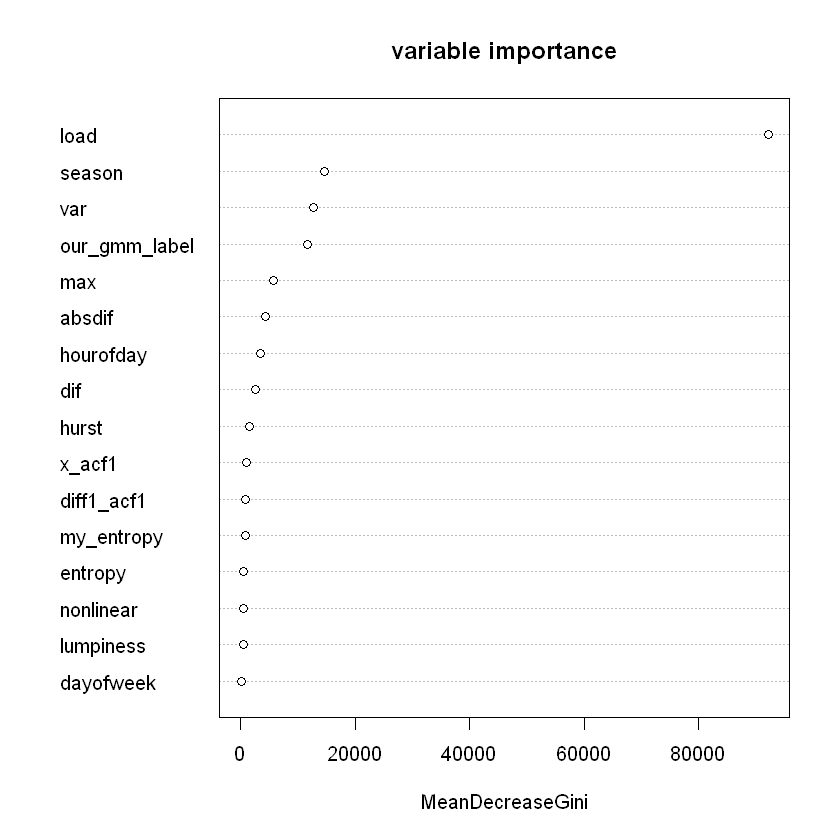

In [59]:
rf.ac = my_rf(our_train[c(-1,-3:-7)], our_train$ac, our_train[c(-1,-3:-7)])

From variable importance plot,we can know that load and season are the most two important features to ac.

In [60]:
install.packages('measures')
library(measures)


Installing package into 'C:/Users/Administrator/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'measures' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpUvpxcB\downloaded_packages


Warning message:
"package 'measures' was built under R version 4.0.5"


In [61]:
# run the xgb model to predict oven appliance
xgb.oven = my_xgb(our_train[c(-1,-3:-7)], our_train$oven, our_train[c(-1,-3:-7)])

In [62]:
ovenbest=mod.stat(xgb.oven ,our_train$oven)
ovenbest

$accuracy
[1] 0.9946

$precision
[1] 0.8096

$recall
[1] 0.8094

$fscore
[1] 0.8095

In [63]:
RMSE.xgb <- rmse(xgb.oven, our_train$oven)
cat(paste("RMSE is", RMSE.xgb))

RMSE is 0.0737012091969773

In [64]:
# install.packages('gbm')
# library(gbm)

# my_gbm = function(our_train.x, our_train.y, our_test.x){
#     our_train = as.data.frame(our_train.x)
#     our_train$y = our_train.y
    
#     gbm.fit = gbm(y ~ load + absdif + max + entropy + hurst + our_gmm_label + lumpiness+my_entropy+diff1_acf1+x_acf1 , data = our_train,distribution = "gaussian", interaction.depth = c(3,6,9),
#                          shrinkage = 0.1,n.trees = 100,n.minobsinnode = 30,verbose=FALSE)

#     my_prediction <- predict(gbm.fit, our_test.x)
    
   
#     my_quantile = length(our_train.y[our_train.y==0]) / length(our_train.y)
#     my_value = quantile(my_prediction, my_quantile)
#     my_prediction = ifelse(my_prediction > my_value, 1, 0)
    
#     return(my_prediction)
# }

In [65]:
# run the gbm model to predict oven appliance
# gbm.oven = my_gbm(our_train[c(-1,-3:-7)], our_train$oven, our_train[c(-1,-3:-7)])

In [66]:
# mod.stat(gbm.oven ,our_train$oven)

In [67]:
# RMSE.gbm <- rmse(gbm.oven, our_train$oven)
# cat(paste("RMSE is", RMSE.gbm))

For oven, we use xgboost and gbm classifier to make prediction.The result shows that the accuracy of xgboost on oven is 0.9946 while f1 is 0.81 and those of gbm are 0.9892 and 0.062.xgboost has higher accuracy and f1 than gbm.Also, the rmse of xgboost is 0.07 which is lower than gbm(0.1).Model is better with lower rmse.So we select xgboost as classifier of oven.

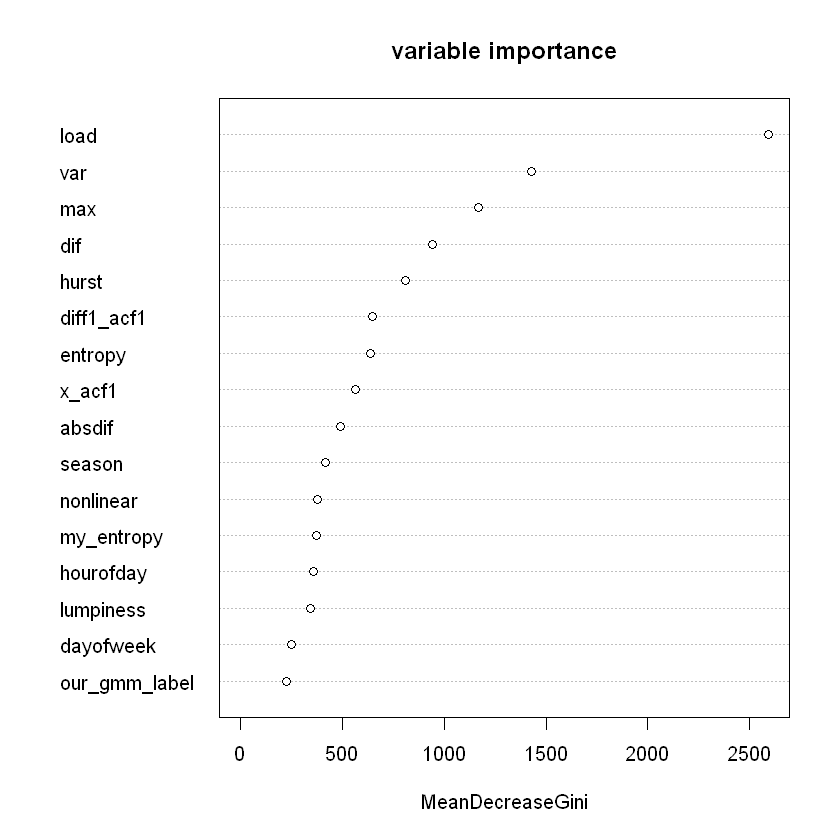

In [68]:
rf.oven = my_rf(our_train[c(-1,-3:-7)], our_train$oven, our_train[c(-1,-3:-7)])

From variable importance plot,we can know that load and var are the most two important features to oven.

In [69]:
# f1.oven = F1(response = rf.oven, truth = our_train$oven, positive = '1')
# f1.oven

In [70]:
# run the xgb model to predict ev appliance
xgb.ev = my_xgb(our_train[c(-1,-3:-7)], our_train$ev, our_train[c(-1,-3:-7)])

In [71]:
evbest=mod.stat(xgb.ev ,our_train$ev)
evbest

$accuracy
[1] 0.9988

$precision
[1] 0.8964

$recall
[1] 0.8964

$fscore
[1] 0.8964

In [72]:
RMSE.xgb <- rmse(xgb.ev, our_train$ev)
cat(paste("RMSE is", RMSE.xgb))

RMSE is 0.0340392549861968

In [73]:
# my_gbm = function(our_train.x, our_train.y, our_test.x){
#     our_train = as.data.frame(our_train.x)
#     our_train$y = our_train.y
    
#     gbm.fit = gbm(y ~ load + absdif + max + var + entropy + season + our_gmm_label + lumpiness+my_entropy+x_acf1 , data = our_train,distribution = "gaussian", interaction.depth = c(3,6,9),
#                          shrinkage = 0.1,n.trees = 100,n.minobsinnode = 30,verbose=FALSE)

#     my_prediction <- predict(gbm.fit, our_test.x)
    
  
#     my_quantile = length(our_train.y[our_train.y==0]) / length(our_train.y)
#     my_value = quantile(my_prediction, my_quantile)
#     my_prediction = ifelse(my_prediction > my_value, 1, 0)
    
#     return(my_prediction)
# }

In [74]:
# run the gbm model to predict ev appliance
# gbm.ev = my_gbm(our_train[c(-1,-3:-7)], our_train$ev, our_train[c(-1,-3:-7)])

In [75]:
# mod.stat(gbm.ev ,our_train$ev)

In [76]:
# RMSE.gbm <- rmse(gbm.ev, our_train$ev)
# cat(paste("RMSE is", RMSE.gbm))

For ev, we use xgboost and gbm classifier to make prediction.The result shows that the accuracy of xgboost on ev is 0.9988 while f1 is 0.9 and those of glm are 0.9967 and 0.7.xgboost has higher accuracy and f1 than gbm.Also, the rmse of xgboost is 0.03 which is lower than gbm(0.05).Model is better with lower rmse.So we select xgboost as classifier of ev.

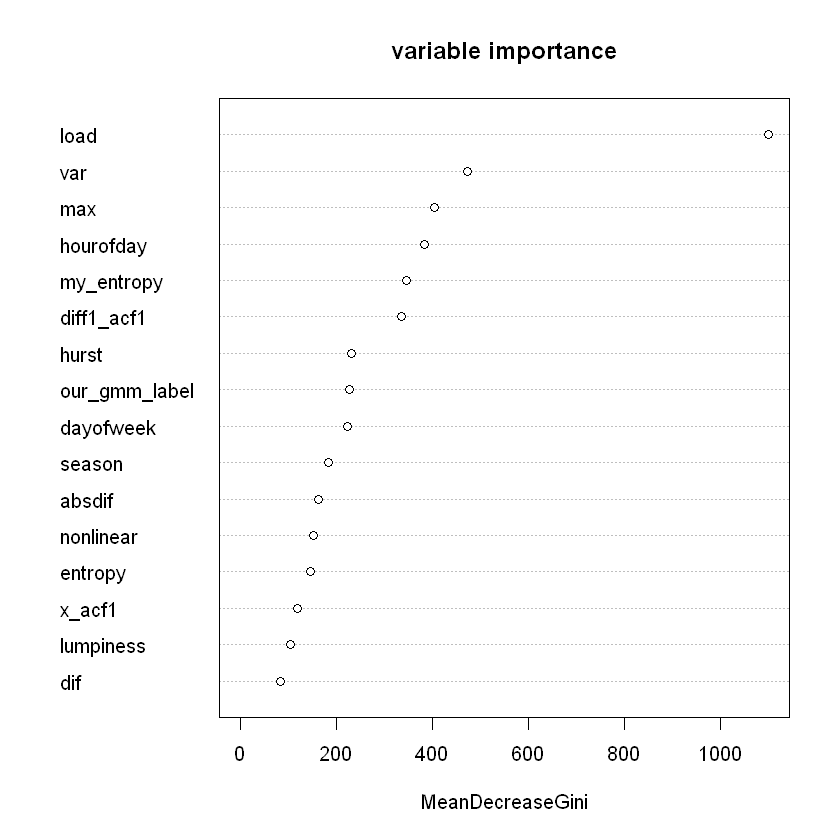

In [77]:
rf.ev = my_rf(our_train[c(-1,-3:-7)], our_train$ev, our_train[c(-1,-3:-7)])

From variable importance plot,we can know that load and var are the most two important features to ev.

In [78]:
# f1.ev = F1(response = rf.ev, truth = our_train$ev, positive = '1')
# f1.ev

In [79]:
# run the xgb model to predict wash appliance
# xgb.wash = my_xgb(our_train[c(-1,-3:-7)], our_train$wash, our_train[c(-1,-3:-7)])


In [80]:
# mod.stat(xgb.wash ,our_train$wash)

In [81]:
# RMSE.xgb <- rmse(xgb.wash, our_train$wash)
# cat(paste("RMSE is", RMSE.xgb))

In [82]:
# install.packages('party')
# library(party)

In [83]:
# my_ctree = function(our_train.x, our_train.y, our_test.x){
#     our_train = as.data.frame(our_train.x)
#     our_train$y = our_train.y
    
#     ct.fit <- ctree(y ~ load + hourofday + max + var  + nonlinear + hurst + season + our_gmm_label + lumpiness+diff1_acf1, data = our_train)


#     my_prediction <- predict(ct.fit, our_test.x)
    
#     # calculate quantile
#     my_quantile = length(our_train.y[our_train.y==0]) / length(our_train.y)
#     my_value = quantile(my_prediction, my_quantile)
#     my_prediction = ifelse(my_prediction > my_value, 1, 0)
    
#     return(my_prediction)
# }

In [84]:
# run the xgb model to predict oven appliance
# ctree.wash = my_ctree(our_train[c(-1,-3:-7)], our_train$wash, our_train[c(-1,-3:-7)])

In [85]:
# washbest=mod.stat(ctree.wash ,our_train$wash)
# washbest

In [86]:
# RMSE.ctree <- rmse(ctree.wash, our_train$wash)
# cat(paste("RMSE is", RMSE.ctree))

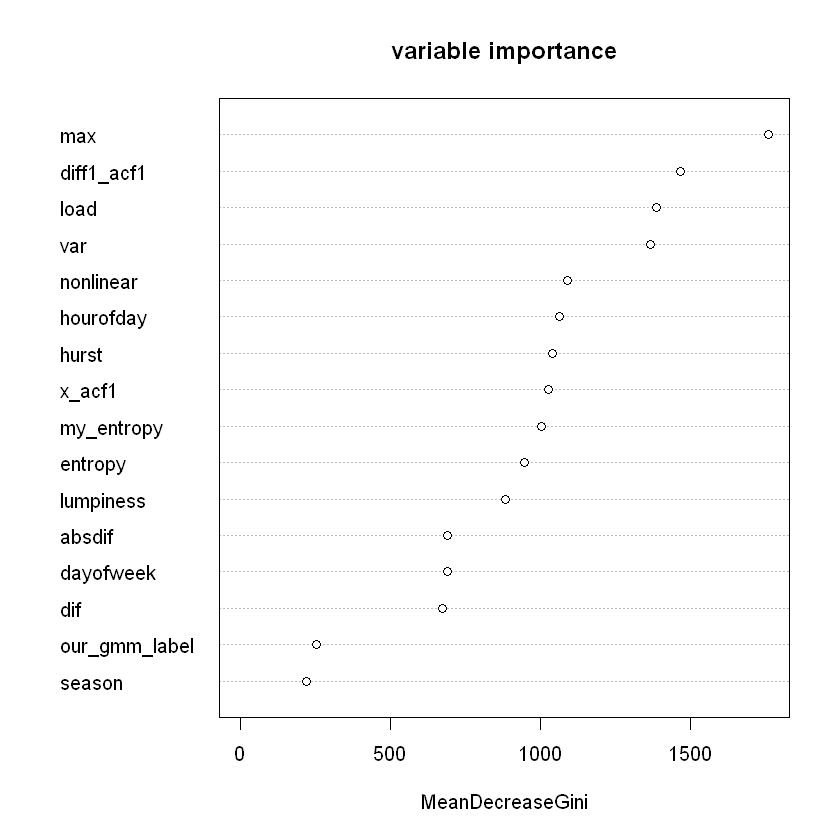

In [87]:
rf.wash = my_rf(our_train[c(-1,-3:-7)], our_train$wash, our_train[c(-1,-3:-7)])

From variable importance plot,we can know that max and load are the most two important features to wash.

In [88]:
f1.wash = F1(response = rf.wash, truth = our_train$wash, positive = '1')
f1.wash

[1] 0.9186093

For wash, we use ctree and randomforest classifier to make prediction.The result shows that the accuracy of ctree on wash is 0.9801 while f1 is 0.48 and f1 of randomforest is 0.92.randomforest has higher f1 than ctree.Also, the rmse of ctree is 0.14 which is relatively high.Model is better with lower rmse.So we select randomforest as classifier of wash.

In [89]:
# run the xgb model to predict wash appliance
# xgb.dryer = my_xgb(our_train[c(-1,-3:-7)], our_train$dryer, our_train[c(-1,-3:-7)])
# dryerbest=mod.stat(xgb.dryer ,our_train$dryer)
# dryerbest

In [90]:
# RMSE.xgb <- rmse(xgb.dryer, our_train$dryer)
# cat(paste("RMSE is", RMSE.xgb))

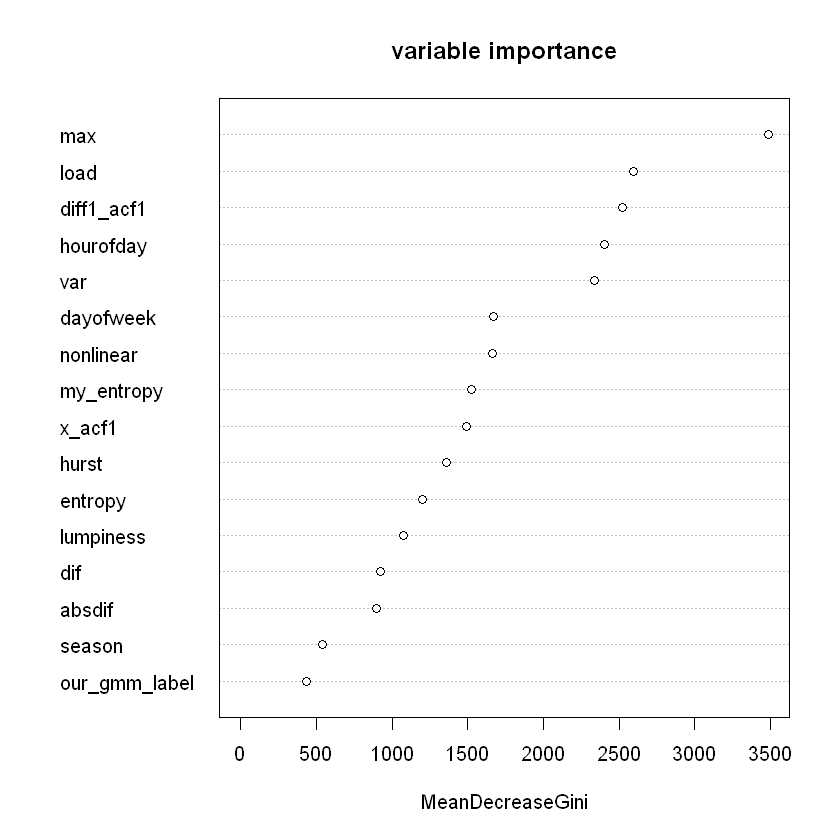

In [91]:
rf.dryer = my_rf(our_train[c(-1,-3:-7)], our_train$dryer, our_train[c(-1,-3:-7)])

From variable importance plot,we can know that max and hourofday are the most two important features to dryer.

In [92]:
f1.dryer = F1(response = rf.dryer, truth = our_train$dryer, positive = '1')
f1.dryer

[1] 0.9590338

For dryer, we use xgboost and randomforest classifier to make prediction.The result shows that the accuracy of xgboost on dryer is 0.97 while f1 is 0.54 and f1 of randomforest is 0.95.randomforest has higher f1 than xgboost.Also, the rmse of xgboost is 0.17 which is relatively high.Model is better with lower rmse.So we select randomforest as classifier of dryer.

In [93]:
F1_mean = (f1.dryer + f1.wash + acbest$fscore + evbest$fscore + ovenbest$fscore)/5
F1_mean

[1] 0.9147086

Finally, we can calculate the mean of the best F1 of each appliance and the mean of F1 is 0.92.

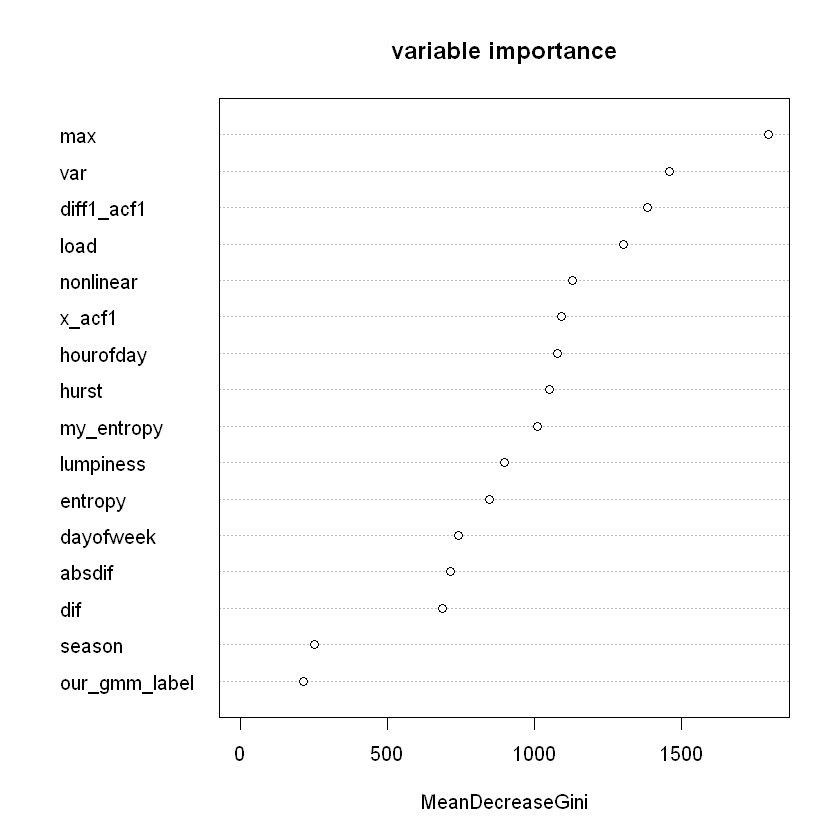

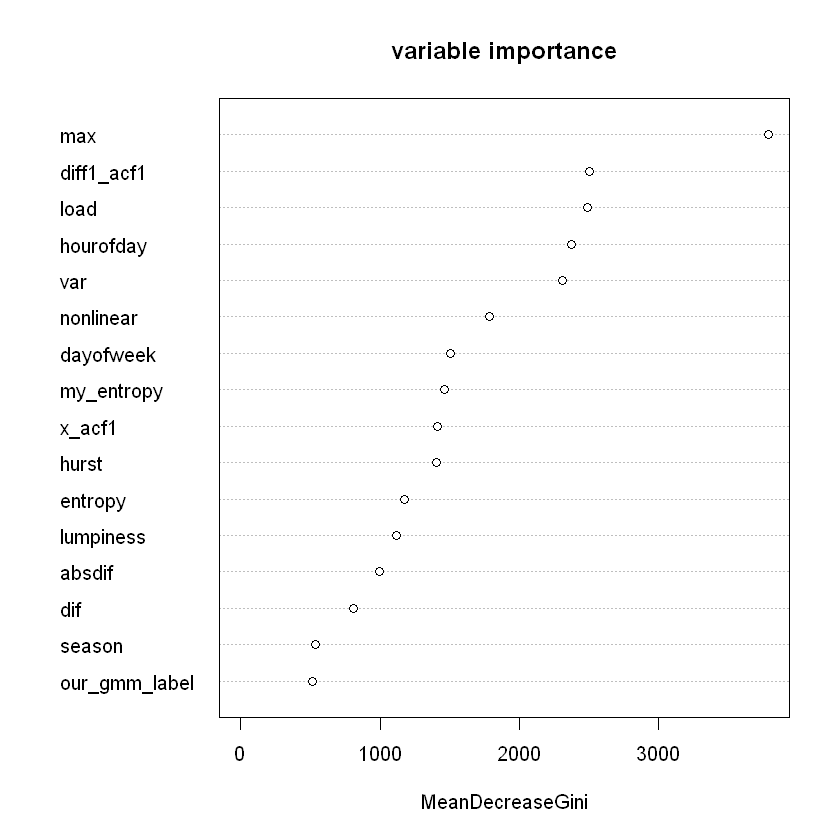

In [94]:
# find out the best model for each appliance
our.ac = my_xgb(our_train[c(-1,-3:-7)], our_train$ac, our_test[-1])
our.ev = my_xgb(our_train[c(-1,-3:-7)], our_train$ev, our_test[-1])
our.oven = my_xgb(our_train[c(-1,-3:-7)], our_train$oven, our_test[-1])
our.wash = my_rf(our_train[c(-1,-3:-7)], our_train$wash, our_test[-1])
our.dryer = my_rf(our_train[c(-1,-3:-7)], our_train$dryer, our_test[-1])
# build a subset for output 
pred.labels = data.frame(our_test$X, our.ac, our.ev, our.oven, our.wash, our.dryer)
colnames(pred.labels) = c('col_index','ac','ev','oven','wash','dryer')

In [95]:
# write to file
write.csv(pred.labels, 'pred_labels.csv', row.names=FALSE)